## Multinomial logistic regression, using this for comparing our good model

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### load data

In [3]:
# Load the data
train_data=pd.read_csv("train.tsv",delimiter="\t", header=None)

# for some reason default encoding wasnt working for test data
# so set to a encoding suggested by the interent
test_data=pd.read_csv("test.tsv",delimiter="\t", header=None, encoding='latin1')

In [4]:
#extract columns we need and rename accordingly
train_data = train_data.rename(columns={train_data.columns[1]: "label", train_data.columns[2]: "text"})
train_data=train_data[['text', 'label']]
train_data.head()

,text,label
0,Says the Annies List political group supports ...,false
1,When did the decline of coal start? It started...,half-true
2,"Hillary Clinton agrees with John McCain ""by vo...",mostly-true
3,Health care reform legislation is likely to ma...,false
4,The economic turnaround started at the end of ...,half-true


In [5]:
train_data['label'].value_counts()

label
half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: count, dtype: int64

In [6]:
test_data = test_data.rename(columns={test_data.columns[1]: "label", test_data.columns[2]: "text"})
test_data=test_data[['text', 'label']]
test_data.head()

,text,label
0,Building a wall on the U.S.-Mexico border will...,TRUE
1,Wisconsin is on pace to double the number of l...,FALSE
2,Says John McCain has done nothing to help the ...,FALSE
3,Suzanne Bonamici supports a plan that will cut...,half-true
4,When asked by a reporter whether hes at the ce...,pants-fire


In [7]:
test_data['label'].value_counts()

label
half-true      267
FALSE          250
mostly-true    249
barely-true    214
TRUE           211
pants-fire      92
Name: count, dtype: int64

In [8]:
label_mapping_train = {
    "pants-fire":0,
    "false": 0,
    'barely-true':0,
    "half-true": 0,
    "mostly-true": 1,
    "true": 1
}
train_data["label"] = train_data["label"].map(label_mapping_train)

label_mapping_test = {
    "pants-fire":0,
    "FALSE": 0,
    'barely-true':0,
    "half-true": 0,
    "mostly-true": 1,
    "TRUE": 1
}
test_data["label"] = test_data["label"].map(label_mapping_test)

test_data.head()

,text,label
0,Building a wall on the U.S.-Mexico border will...,1
1,Wisconsin is on pace to double the number of l...,0
2,Says John McCain has done nothing to help the ...,0
3,Suzanne Bonamici supports a plan that will cut...,0
4,When asked by a reporter whether hes at the ce...,0


In [17]:
len(test_data[test_data['label']==0])
#len(test_data[test_data['label']==1])

823

### Converting to bag of words

In [10]:
X_train = train_data["text"]
y_train = train_data["label"]
X_test = test_data["text"]
y_test = test_data["label"]


vectorizer = CountVectorizer(stop_words="english", max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)  # Fit on training data
X_test_bow = vectorizer.transform(X_test)   

### Logistic regression model

In [11]:
# train
model=LogisticRegression()
model.fit(X_train_bow, y_train)

LogisticRegression()

In [12]:
# testing
y_pred = model.predict(X_test_bow)

In [13]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6219797349961029

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73       823
           1       0.46      0.33      0.38       460

    accuracy                           0.62      1283
   macro avg       0.57      0.56      0.56      1283
weighted avg       0.60      0.62      0.60      1283



[[647 176]
 [309 151]]


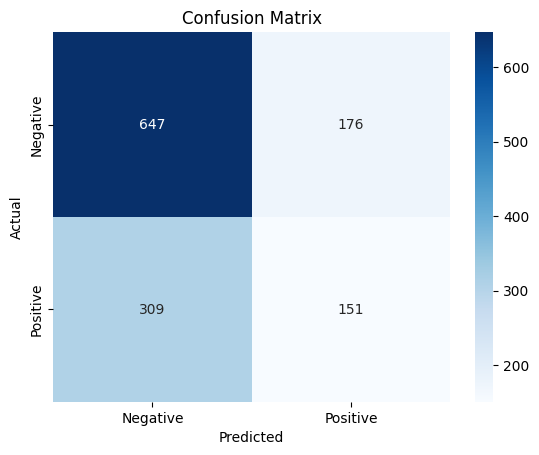

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()